In [53]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import losses
from matplotlib import pyplot
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import itertools
from keras.utils import to_categorical

In [11]:
imageSize = 4096
samples = np.load("dataset_fixed/X_fixed.npy")
labels = np.load("dataset_fixed/Y_fixed.npy")
xTrain, xTest, yTrain, yTest = train_test_split(samples, labels, test_size=0.2, stratify=labels)
samples = samples.reshape(samples.shape[0], imageSize)
samples = samples.astype('float32')
samples = samples/255
print(xTrain.shape)

(1649, 64, 64)


In [12]:
model = Sequential()
model.add(Dense(units=350, activation='relu', input_shape=(imageSize,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 350)               1433950   
_________________________________________________________________
dense_5 (Dense)              (None, 50)                17550     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 1,452,010
Trainable params: 1,452,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
training = model.fit(samples, labels, epochs=500, batch_size=250, verbose=1, validation_split=0.2, shuffle=True)

Train on 1649 samples, validate on 413 samples
Epoch 1/500
1649/1649 [==============================] - 1s 736us/step - loss: 2.2832 - accuracy: 0.1310 - val_loss: 2.5520 - val_accuracy: 0.0000e+00
Epoch 2/500
1649/1649 [==============================] - 0s 242us/step - loss: 2.2260 - accuracy: 0.1255 - val_loss: 2.9788 - val_accuracy: 0.0000e+00
Epoch 3/500
1649/1649 [==============================] - 0s 236us/step - loss: 2.1727 - accuracy: 0.1255 - val_loss: 3.5705 - val_accuracy: 0.0000e+00
Epoch 4/500
1649/1649 [==============================] - 0s 255us/step - loss: 2.1323 - accuracy: 0.1255 - val_loss: 4.1907 - val_accuracy: 0.0000e+00
Epoch 5/500
1649/1649 [==============================] - 0s 271us/step - loss: 2.1047 - accuracy: 0.1959 - val_loss: 4.7646 - val_accuracy: 0.0000e+00
Epoch 6/500
1649/1649 [==============================] - 0s 287us/step - loss: 2.0871 - accuracy: 0.1995 - val_loss: 5.2973 - val_accuracy: 0.0024
Epoch 7/500
1649/1649 [============================

Epoch 55/500
1649/1649 [==============================] - 1s 308us/step - loss: 1.0047 - accuracy: 0.6671 - val_loss: 12.0658 - val_accuracy: 0.0000e+00
Epoch 56/500
1649/1649 [==============================] - 0s 273us/step - loss: 0.9898 - accuracy: 0.6786 - val_loss: 12.2028 - val_accuracy: 0.0024
Epoch 57/500
1649/1649 [==============================] - 0s 286us/step - loss: 0.9794 - accuracy: 0.7101 - val_loss: 12.3127 - val_accuracy: 0.0024
Epoch 58/500
1649/1649 [==============================] - 0s 238us/step - loss: 0.9664 - accuracy: 0.7022 - val_loss: 12.4439 - val_accuracy: 0.0024
Epoch 59/500
1649/1649 [==============================] - 0s 264us/step - loss: 0.9603 - accuracy: 0.6992 - val_loss: 12.6517 - val_accuracy: 0.0024
Epoch 60/500
1649/1649 [==============================] - 0s 272us/step - loss: 0.9548 - accuracy: 0.6986 - val_loss: 12.7375 - val_accuracy: 0.0024
Epoch 61/500
1649/1649 [==============================] - 0s 262us/step - loss: 0.9355 - accuracy: 0.7

Epoch 110/500
1649/1649 [==============================] - 1s 305us/step - loss: 0.5986 - accuracy: 0.8211 - val_loss: 16.2596 - val_accuracy: 0.0024
Epoch 111/500
1649/1649 [==============================] - 1s 321us/step - loss: 0.5985 - accuracy: 0.8235 - val_loss: 16.2104 - val_accuracy: 0.0024
Epoch 112/500
1649/1649 [==============================] - 1s 316us/step - loss: 0.5898 - accuracy: 0.8272 - val_loss: 16.2550 - val_accuracy: 0.0024
Epoch 113/500
1649/1649 [==============================] - 0s 285us/step - loss: 0.5828 - accuracy: 0.8296 - val_loss: 16.2126 - val_accuracy: 0.0024
Epoch 114/500
1649/1649 [==============================] - 0s 290us/step - loss: 0.5760 - accuracy: 0.8308 - val_loss: 16.4989 - val_accuracy: 0.0024
Epoch 115/500
1649/1649 [==============================] - 0s 282us/step - loss: 0.5756 - accuracy: 0.8363 - val_loss: 16.3758 - val_accuracy: 0.0024
Epoch 116/500
1649/1649 [==============================] - 1s 315us/step - loss: 0.5670 - accuracy: 

1649/1649 [==============================] - 0s 285us/step - loss: 0.4347 - accuracy: 0.8805 - val_loss: 18.2247 - val_accuracy: 0.0024
Epoch 165/500
1649/1649 [==============================] - 0s 285us/step - loss: 0.4301 - accuracy: 0.8757 - val_loss: 17.9826 - val_accuracy: 0.0024
Epoch 166/500
1649/1649 [==============================] - 1s 320us/step - loss: 0.4269 - accuracy: 0.8811 - val_loss: 17.9524 - val_accuracy: 0.0024
Epoch 167/500
1649/1649 [==============================] - 0s 298us/step - loss: 0.4261 - accuracy: 0.8805 - val_loss: 18.2094 - val_accuracy: 0.0024
Epoch 168/500
1649/1649 [==============================] - 0s 269us/step - loss: 0.4203 - accuracy: 0.8811 - val_loss: 18.0524 - val_accuracy: 0.0024
Epoch 169/500
1649/1649 [==============================] - 0s 263us/step - loss: 0.4210 - accuracy: 0.8745 - val_loss: 18.1193 - val_accuracy: 0.0024
Epoch 170/500
1649/1649 [==============================] - 0s 261us/step - loss: 0.4186 - accuracy: 0.8799 - val_l

Epoch 219/500
1649/1649 [==============================] - 1s 309us/step - loss: 0.3511 - accuracy: 0.9054 - val_loss: 19.1471 - val_accuracy: 0.0024
Epoch 220/500
1649/1649 [==============================] - 1s 335us/step - loss: 0.3488 - accuracy: 0.9042 - val_loss: 19.3945 - val_accuracy: 0.0024
Epoch 221/500
1649/1649 [==============================] - 1s 319us/step - loss: 0.3576 - accuracy: 0.8908 - val_loss: 19.3776 - val_accuracy: 0.0024
Epoch 222/500
1649/1649 [==============================] - 1s 358us/step - loss: 0.3609 - accuracy: 0.8987 - val_loss: 19.0393 - val_accuracy: 0.0024
Epoch 223/500
1649/1649 [==============================] - 1s 306us/step - loss: 0.3536 - accuracy: 0.8957 - val_loss: 19.0758 - val_accuracy: 0.0024
Epoch 224/500
1649/1649 [==============================] - 0s 280us/step - loss: 0.3532 - accuracy: 0.9054 - val_loss: 19.5290 - val_accuracy: 0.0024
Epoch 225/500
1649/1649 [==============================] - 0s 302us/step - loss: 0.3492 - accuracy: 

1649/1649 [==============================] - 0s 258us/step - loss: 0.2981 - accuracy: 0.9169 - val_loss: 19.7962 - val_accuracy: 0.0024
Epoch 274/500
1649/1649 [==============================] - 0s 265us/step - loss: 0.2974 - accuracy: 0.9175 - val_loss: 20.0407 - val_accuracy: 0.0024
Epoch 275/500
1649/1649 [==============================] - 0s 289us/step - loss: 0.2933 - accuracy: 0.9200 - val_loss: 20.0778 - val_accuracy: 0.0024
Epoch 276/500
1649/1649 [==============================] - 0s 296us/step - loss: 0.2908 - accuracy: 0.9206 - val_loss: 19.9444 - val_accuracy: 0.0024
Epoch 277/500
1649/1649 [==============================] - 0s 287us/step - loss: 0.2909 - accuracy: 0.9242 - val_loss: 19.9025 - val_accuracy: 0.0024
Epoch 278/500
1649/1649 [==============================] - 0s 297us/step - loss: 0.2870 - accuracy: 0.9236 - val_loss: 20.2052 - val_accuracy: 0.0024
Epoch 279/500
1649/1649 [==============================] - 0s 269us/step - loss: 0.2887 - accuracy: 0.9206 - val_l

Epoch 328/500
1649/1649 [==============================] - 1s 317us/step - loss: 0.2501 - accuracy: 0.9327 - val_loss: 20.7159 - val_accuracy: 0.0024
Epoch 329/500
1649/1649 [==============================] - 1s 308us/step - loss: 0.2474 - accuracy: 0.9327 - val_loss: 20.8945 - val_accuracy: 0.0024
Epoch 330/500
1649/1649 [==============================] - 0s 255us/step - loss: 0.2572 - accuracy: 0.9315 - val_loss: 20.6255 - val_accuracy: 0.0024
Epoch 331/500
1649/1649 [==============================] - 0s 202us/step - loss: 0.2496 - accuracy: 0.9381 - val_loss: 20.6366 - val_accuracy: 0.0024
Epoch 332/500
1649/1649 [==============================] - 0s 296us/step - loss: 0.2538 - accuracy: 0.9290 - val_loss: 20.8229 - val_accuracy: 0.0024
Epoch 333/500
1649/1649 [==============================] - 0s 273us/step - loss: 0.2579 - accuracy: 0.9266 - val_loss: 21.1795 - val_accuracy: 0.0024
Epoch 334/500
1649/1649 [==============================] - 0s 294us/step - loss: 0.2773 - accuracy: 

1649/1649 [==============================] - 0s 285us/step - loss: 0.2175 - accuracy: 0.9448 - val_loss: 21.5539 - val_accuracy: 0.0024
Epoch 383/500
1649/1649 [==============================] - 1s 312us/step - loss: 0.2188 - accuracy: 0.9412 - val_loss: 21.2930 - val_accuracy: 0.0024
Epoch 384/500
1649/1649 [==============================] - 1s 334us/step - loss: 0.2127 - accuracy: 0.9460 - val_loss: 21.3279 - val_accuracy: 0.0024
Epoch 385/500
1649/1649 [==============================] - 1s 338us/step - loss: 0.2166 - accuracy: 0.9454 - val_loss: 21.2664 - val_accuracy: 0.0024
Epoch 386/500
1649/1649 [==============================] - ETA: 0s - loss: 0.2233 - accuracy: 0.93 - 0s 263us/step - loss: 0.2194 - accuracy: 0.9412 - val_loss: 21.3023 - val_accuracy: 0.0024
Epoch 387/500
1649/1649 [==============================] - 0s 269us/step - loss: 0.2089 - accuracy: 0.9448 - val_loss: 21.3663 - val_accuracy: 0.0024
Epoch 388/500
1649/1649 [==============================] - 1s 321us/step

1649/1649 [==============================] - 1s 330us/step - loss: 0.1818 - accuracy: 0.9539 - val_loss: 21.8793 - val_accuracy: 0.0024
Epoch 437/500
1649/1649 [==============================] - 1s 354us/step - loss: 0.1784 - accuracy: 0.9600 - val_loss: 21.9547 - val_accuracy: 0.0024
Epoch 438/500
1649/1649 [==============================] - 1s 356us/step - loss: 0.1793 - accuracy: 0.9527 - val_loss: 21.9619 - val_accuracy: 0.0024
Epoch 439/500
1649/1649 [==============================] - 0s 269us/step - loss: 0.1783 - accuracy: 0.9551 - val_loss: 21.8265 - val_accuracy: 0.0024
Epoch 440/500
1649/1649 [==============================] - 0s 275us/step - loss: 0.1789 - accuracy: 0.9588 - val_loss: 21.7960 - val_accuracy: 0.0024
Epoch 441/500
1649/1649 [==============================] - 1s 367us/step - loss: 0.1783 - accuracy: 0.9588 - val_loss: 21.9928 - val_accuracy: 0.0024
Epoch 442/500
1649/1649 [==============================] - 1s 329us/step - loss: 0.1748 - accuracy: 0.9576 - val_l

Epoch 491/500
1649/1649 [==============================] - 0s 294us/step - loss: 0.1532 - accuracy: 0.9673 - val_loss: 22.3657 - val_accuracy: 0.0024
Epoch 492/500
1649/1649 [==============================] - 1s 333us/step - loss: 0.1505 - accuracy: 0.9660 - val_loss: 22.3686 - val_accuracy: 0.0024
Epoch 493/500
1649/1649 [==============================] - 1s 328us/step - loss: 0.1504 - accuracy: 0.9679 - val_loss: 22.5253 - val_accuracy: 0.0024
Epoch 494/500
1649/1649 [==============================] - 0s 275us/step - loss: 0.1507 - accuracy: 0.9654 - val_loss: 22.5168 - val_accuracy: 0.0024
Epoch 495/500
1649/1649 [==============================] - 0s 279us/step - loss: 0.1478 - accuracy: 0.9648 - val_loss: 22.5256 - val_accuracy: 0.0024
Epoch 496/500
1649/1649 [==============================] - 1s 340us/step - loss: 0.1493 - accuracy: 0.9685 - val_loss: 22.8953 - val_accuracy: 0.0024
Epoch 497/500
1649/1649 [==============================] - 0s 299us/step - loss: 0.1610 - accuracy: 

In [ ]:
print(training.history.keys())

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('History of Accuracy in Train and Validation Datasets')
plt.legend(['Train Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('History of Loss in Train and Validation Datasets')

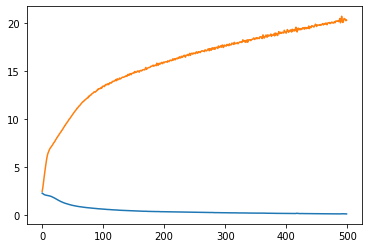

In [8]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = np.random.seed(7))
cvscores = []
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

In [39]:
test_results = model.evaluate(samples, labels, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("Loss " + str(test_results[0]))
print("Accuracy " + str(test_results[1]))

2062/2062 [==============================] - 0s 81us/step
Loss 4.610833055729084
Accuracy 0.7759456634521484


In [35]:
xTest = xTest.reshape(xTest.shape[0], 4096)
xTest = xTest.astype('float32')
xTest = xTest/255
predictions = model.predict(xTest, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)

In [36]:
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)

In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

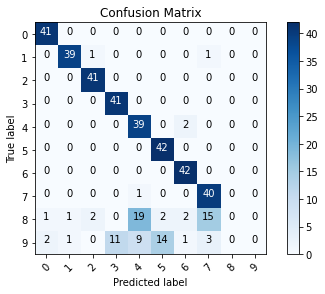

In [38]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(confusionMatrix, cm_plot_labels)

In [67]:
#rPredictions

acc = accuracy_score(rLabels, rPredictions)
pre = precision_score(rLabels, rPredictions, average='micro')
recal = recall_score(rLabels, rPredictions, average='micro')
f1 = f1_score(rLabels, rPredictions, average='micro')
print(acc)
print(pre)
print(recal)
print(f1)
#print(accuracy_score(rLabels, rPredictions)
#print(precision_score(rLabels, rPredictions)
#print(recall_score(rLabels, rPredictions, average='micro'))
#print(f1_score(rLabels, rPredictions, average='micro'))

0.7869249394673123
0.7869249394673123
0.7869249394673123
0.7869249394673122
